In [6]:
import pandas as pd

# Loading datasets
production_data = pd.read_csv("most_cleaned_production_data.csv")
price_data = pd.read_csv("most_cleaned_price_data.csv")

# Print datasets
print(production_data.head())
print(price_data.head())


# Check for missing values
print(production_data.isnull().sum())
print(price_data.isnull().sum())


# I will drop the 'Note' column because its the one having missing values and is not useful for my analysis
production_data_clean = production_data.drop(columns=['Note'])

# I will verify that the column is dropped
print(production_data_clean.head())


# The next is, I will check for duplicates in the two datasets
print("Duplicates in Production Data:", production_data_clean.duplicated().sum())
print("Duplicates in Price Data:", price_data.duplicated().sum())   # From the output it shows I dont have any duplicate. So I will proceed with my cleaning


# Converting data types
production_data_clean['Year'] = pd.to_numeric(production_data_clean['Year'], errors='coerce')
production_data_clean['Value'] = pd.to_numeric(production_data_clean['Value'], errors='coerce')
price_data['Year'] = pd.to_numeric(price_data['Year'], errors='coerce')
price_data['Value'] = pd.to_numeric(price_data['Value'], errors='coerce')

# Verifying data types
print("Production Data Types after conversion:\n", production_data_clean.dtypes)
print("Price Data Types after conversion:\n", price_data.dtypes)

# Making text standard
production_data_clean['Area'] = production_data_clean['Area'].str.lower()
production_data_clean['Element'] = production_data_clean['Element'].str.lower()
production_data_clean['Area'] = production_data_clean['Area'].str.strip()
production_data_clean['Element'] = production_data_clean['Element'].str.strip()

price_data['Area'] = price_data['Area'].str.lower()
price_data['Element'] = price_data['Element'].str.lower()
price_data['Area'] = price_data['Area'].str.strip()
price_data['Element'] = price_data['Element'].str.strip()

# Let's fix typos
production_data_clean['Area'] = production_data_clean['Area'].replace('nigeria', 'Nigeria')
price_data['Area'] = price_data['Area'].replace('nigeria', 'Nigeria')

# Now let's verify the consistency of those text
print("Unique Areas:", production_data_clean['Area'].unique())
print("Unique Elements:", production_data_clean['Element'].unique())
print("Unique Areas:", price_data['Area'].unique())
print("Unique Elements:", price_data['Element'].unique())


# Let's merge the datasets on 'Year' and  save
agriculture_datasets = pd.merge(production_data_clean, price_data, on='Year', how='outer')
agriculture_datasets.to_csv("cleaned_agriculture_datasets", index=False)





  Domain Code                        Domain  Area Code (M49)     Area  \
0         QCL  Crops and livestock products              566  Nigeria   
1         QCL  Crops and livestock products              566  Nigeria   
2         QCL  Crops and livestock products              566  Nigeria   
3         QCL  Crops and livestock products              566  Nigeria   
4         QCL  Crops and livestock products              566  Nigeria   

   Element Code         Element  Item Code (CPC)          Item  Year Code  \
0          5312  Area harvested              112  Maize (corn)       2000   
1          5412           Yield              112  Maize (corn)       2000   
2          5510      Production              112  Maize (corn)       2000   
3          5312  Area harvested              112  Maize (corn)       2001   
4          5412           Yield              112  Maize (corn)       2001   

   Year   Unit      Value Flag Flag Description Note  
0  2000     ha  3159000.0    A  Official fi

Index(['Domain Code_x', 'Domain_x', 'Area Code (M49)_x', 'Area_x',
       'Element Code_x', 'Element_x', 'Item Code (CPC)_x', 'Item_x',
       'Year Code_x', 'Year', 'Unit_x', 'Value_x', 'Flag_x',
       'Flag Description_x', 'Domain Code_y', 'Domain_y', 'Area Code (M49)_y',
       'Area_y', 'Element Code_y', 'Element_y', 'Item Code (CPC)_y', 'Item_y',
       'Year Code_y', 'Months Code', 'Months', 'Unit_y', 'Value_y', 'Flag_y',
       'Flag Description_y'],
      dtype='object')


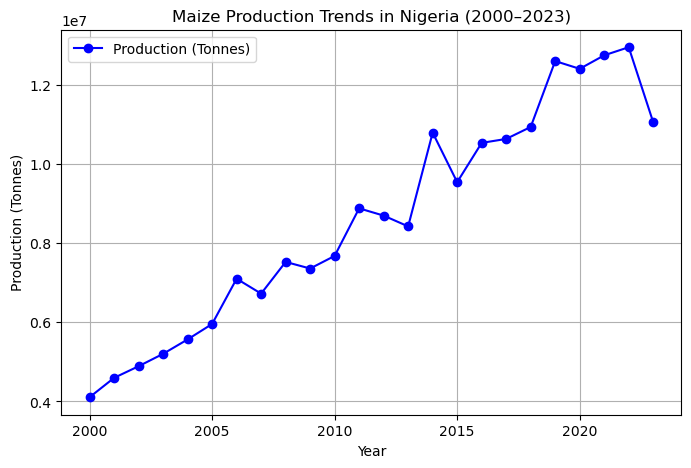

Yield Data:
   Domain Code_x                      Domain_x  Area Code (M49)_x   Area_x  \
1            QCL  Crops and livestock products                566  Nigeria   
4            QCL  Crops and livestock products                566  Nigeria   
7            QCL  Crops and livestock products                566  Nigeria   
10           QCL  Crops and livestock products                566  Nigeria   
13           QCL  Crops and livestock products                566  Nigeria   

    Element Code_x Element_x  Item Code (CPC)_x        Item_x  Year Code_x  \
1             5412     yield                112  Maize (corn)         2000   
4             5412     yield                112  Maize (corn)         2001   
7             5412     yield                112  Maize (corn)         2002   
10            5412     yield                112  Maize (corn)         2003   
13            5412     yield                112  Maize (corn)         2004   

    Year  ...                   Element_y  Item Co

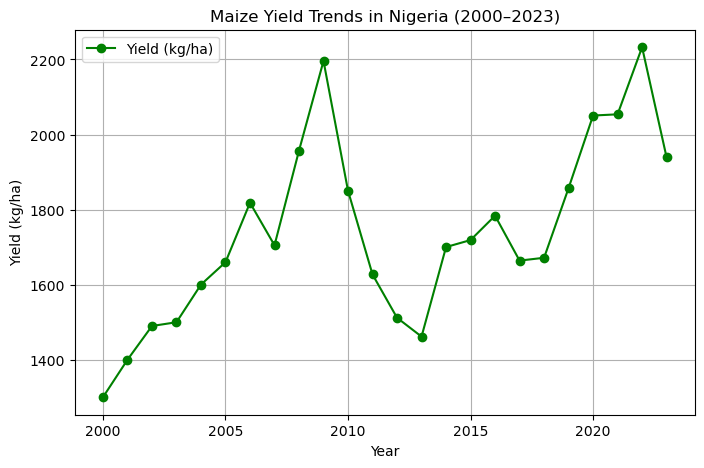

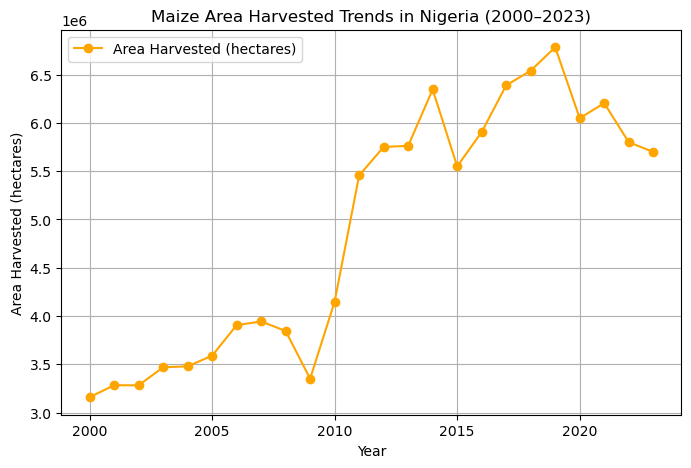

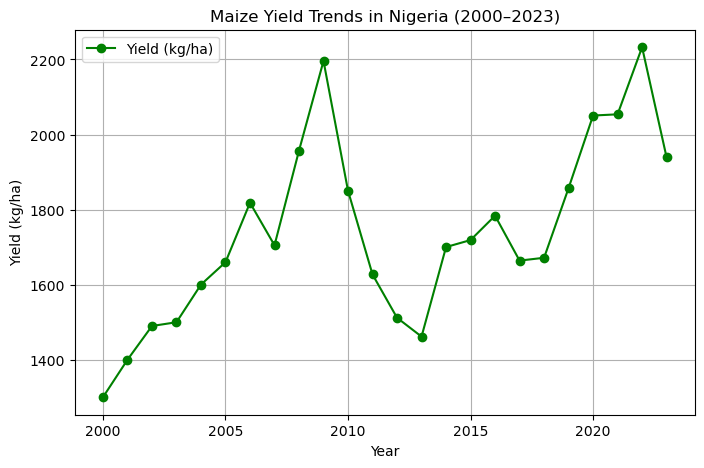

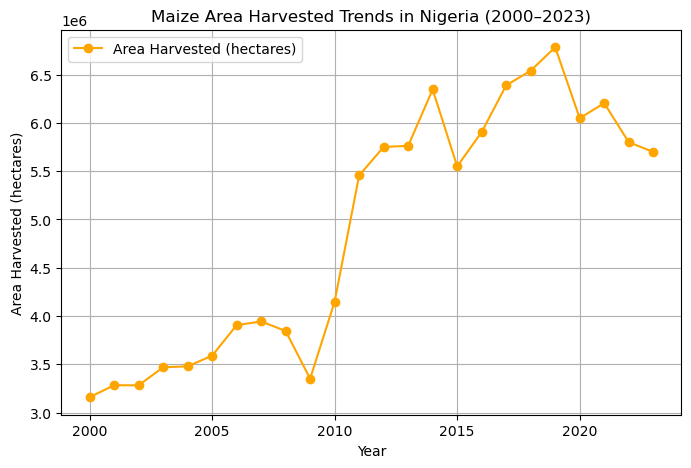

Visuals created: production_trend.png, price_trends.png, yield_vs_price.png


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("cleaned_agriculture_datasets.csv")

# Check column names
print(df.columns)

# Filter for production, yield, and area harvested
production = df[df["Element_x"] == "production"]
yield_data = df[df["Element_x"] == "yield"]
area_harvested = df[df["Element_x"] == "area harvested"]

# Plot production trends
plt.figure(figsize=(8, 5))  # Set the figure size
plt.plot(production["Year"], production["Value_x"], marker='o', color='blue', label='Production (Tonnes)')
plt.title('Maize Production Trends in Nigeria (2000–2023)')
plt.xlabel('Year')
plt.ylabel('Production (Tonnes)')
plt.grid(True)
plt.legend()
plt.show()


import pandas as pd

# Load the dataset
df = pd.read_csv("cleaned_agriculture_datasets.csv")

# Filter for yield
yield_data = df[df["Element_x"] == "yield"]

# Filter for area harvested
area_harvested = df[df["Element_x"] == "area harvested"]

# Check the filtered data
print("Yield Data:")
print(yield_data.head())

print("\nArea Harvested Data:")
print(area_harvested.head())


import matplotlib.pyplot as plt

# Plot yield trends
plt.figure(figsize=(8, 5))  # Set the size of the plot
plt.plot(yield_data["Year"], yield_data["Value_x"], marker='o', color='green', label='Yield (kg/ha)')
plt.title('Maize Yield Trends in Nigeria (2000–2023)')
plt.xlabel('Year')
plt.ylabel('Yield (kg/ha)')
plt.grid(True)
plt.legend()
plt.show()

# Plot area harvested trends
plt.figure(figsize=(8, 5))  # Set the size of the plot
plt.plot(area_harvested["Year"], area_harvested["Value_x"], marker='o', color='orange', label='Area Harvested (hectares)')
plt.title('Maize Area Harvested Trends in Nigeria (2000–2023)')
plt.xlabel('Year')
plt.ylabel('Area Harvested (hectares)')
plt.grid(True)
plt.legend()
plt.show()

# Save yield trends plot
plt.figure(figsize=(8, 5))
plt.plot(yield_data["Year"], yield_data["Value_x"], marker='o', color='green', label='Yield (kg/ha)')
plt.title('Maize Yield Trends in Nigeria (2000–2023)')
plt.xlabel('Year')
plt.ylabel('Yield (kg/ha)')
plt.grid(True)
plt.legend()
plt.savefig('maize_yield_trends.png')  # Save the plot as an image
plt.show()

# Save area harvested trends plot
plt.figure(figsize=(8, 5))
plt.plot(area_harvested["Year"], area_harvested["Value_x"], marker='o', color='orange', label='Area Harvested (hectares)')
plt.title('Maize Area Harvested Trends in Nigeria (2000–2023)')
plt.xlabel('Year')
plt.ylabel('Area Harvested (hectares)')
plt.grid(True)
plt.legend()
plt.savefig('maize_area_harvested_trends.png')  # Save the plot as an image
plt.show()


# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your cleaned dataset
df = pd.read_csv("cleaned_agriculture_datasets.csv")

# 1. Line Chart - Production Over Time
# Filter production data
production = df[df['Element_x'] == 'production']

plt.figure(figsize=(10, 5))
plt.plot(production['Year'], production['Value_x'])
plt.title("Nigeria's Maize Production (2000-2023)")
plt.xlabel("Year")
plt.ylabel("Production (Tonnes)")
plt.grid(True)
plt.savefig('production_trend.png')  # Save the chart
plt.close()

# 2. Bar Chart - Price Trends
# Filter price data
price = df[df['Element_y'] == 'producer price (usd/tonne)']

plt.figure(figsize=(10, 5))
plt.bar(price['Year'], price['Value_y'])
plt.title("Maize Price Trends (2001-2020)")
plt.xlabel("Year")
plt.ylabel("Price (USD/Tonne)")
plt.xticks(rotation=45)  # Rotate year labels
plt.savefig('price_trends.png')
plt.close()

# 3. Scatter Plot - Yield vs Price
# Filter yield data and merge with price
yield_data = df[df['Element_x'] == 'yield']
merged = pd.merge(yield_data, price, on='Year', suffixes=('_yield', '_price'))

plt.figure(figsize=(10, 5))
plt.scatter(merged['Value_x_yield'], merged['Value_y_price'])
plt.title("Yield vs Price Relationship")
plt.xlabel("Yield (kg/ha)")
plt.ylabel("Price (USD/Tonne)")
plt.savefig('yield_vs_price.png')
plt.close()

print("Visuals created: production_trend.png, price_trends.png, yield_vs_price.png")